In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
rdat = pd.read_csv('RegularSeasonCompactResults.csv')

In [3]:
tdat = pd.read_csv('TourneyCompactResults.csv')

In [4]:
dat = pd.concat([rdat, tdat])

In [5]:
dat.shape

(147339, 8)

In [6]:
dat.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [19]:
games = dat.loc[:, ['Wteam', 'Lteam']].copy()

In [20]:
index2code = pd.Series(sorted(games.Wteam.unique()))

In [21]:
index2code.head()

0    1101
1    1102
2    1103
3    1104
4    1105
dtype: int64

In [22]:
code2index = index2code.reset_index().set_index(0).loc[:, 'index']

In [23]:
code2index.head()

0
1101    0
1102    1
1103    2
1104    3
1105    4
Name: index, dtype: int64

In [24]:
games.loc[:, 'Windex'] = games.Wteam.map(code2index)
games.loc[:, 'Lindex'] = games.Lteam.map(code2index)

In [25]:
games.head()

,Wteam,Lteam,Windex,Lindex
0,1228,1328,127,227
1,1106,1354,5,253
2,1112,1223,11,122
3,1165,1432,64,331
4,1192,1447,91,346


In [26]:
games.loc[:, 'Min_index'] = games.loc[:, ['Windex', 'Lindex']].min(axis=1)
games.loc[:, 'Max_index'] = games.loc[:, ['Windex', 'Lindex']].max(axis=1)

In [27]:
games.head()

,Wteam,Lteam,Windex,Lindex,Min_index,Max_index
0,1228,1328,127,227,127,227
1,1106,1354,5,253,5,253
2,1112,1223,11,122,11,122
3,1165,1432,64,331,64,331
4,1192,1447,91,346,91,346


In [28]:
games.loc[:, 'game'] = games.Min_index.apply(str) + ', ' + games.Max_index.apply(str)

In [29]:
games.head()

,Wteam,Lteam,Windex,Lindex,Min_index,Max_index,game
0,1228,1328,127,227,127,227,"127, 227"
1,1106,1354,5,253,5,253,"5, 253"
2,1112,1223,11,122,11,122,"11, 122"
3,1165,1432,64,331,64,331,"64, 331"
4,1192,1447,91,346,91,346,"91, 346"


In [30]:
matchups = games.game.value_counts()

In [31]:
matchups.head()

141, 142    81
110, 287    79
110, 259    78
36, 149     76
264, 287    76
Name: game, dtype: int64

In [32]:
matchups = matchups.reset_index()

In [33]:
matchups.head()

,index,game
0,"141, 142",81
1,"110, 287",79
2,"110, 259",78
3,"36, 149",76
4,"264, 287",76


In [34]:
matchups.columns = ['game', 'counts']

In [35]:
matchups.head()

,game,counts
0,"141, 142",81
1,"110, 287",79
2,"110, 259",78
3,"36, 149",76
4,"264, 287",76


In [43]:
matchups.loc[:, 'team1'] = matchups.game.str.extract(r'(\d+), \d+', expand=False).astype(int)
matchups.loc[:, 'team2'] = matchups.game.str.extract(r'\d+, (\d+)', expand=False).astype(int)

In [44]:
matchups.head()

,game,counts,team1,team2
0,"141, 142",81,141,142
1,"110, 287",79,110,287
2,"110, 259",78,110,259
3,"36, 149",76,36,149
4,"264, 287",76,264,287


In [45]:
matchups.dtypes

game      object
counts     int64
team1      int64
team2      int64
dtype: object

In [60]:
matchups.team2.max()

363

In [61]:
match_matrix = np.zeros((364, 364))

In [54]:
test = np.zeros((2, 2))

In [56]:
test[[0, 1], [1, 0]] = [1, 2]

In [57]:
test

array([[ 0.,  1.],
       [ 2.,  0.]])

In [62]:
match_matrix[matchups.team1.values, matchups.team2.values] = matchups.counts.values
match_matrix[matchups.team2.values, matchups.team1.values] = matchups.counts.values

In [63]:
match_matrix

array([[  0.,   0.,   0., ...,   1.,   0.,   0.],
       [  0.,   0.,   0., ...,   1.,   1.,   2.],
       [  0.,   0.,   0., ...,   2.,   0.,  27.],
       ..., 
       [  1.,   1.,   2., ...,   0.,   0.,   1.],
       [  0.,   1.,   0., ...,   0.,   0.,   0.],
       [  0.,   2.,  27., ...,   1.,   0.,   0.]])

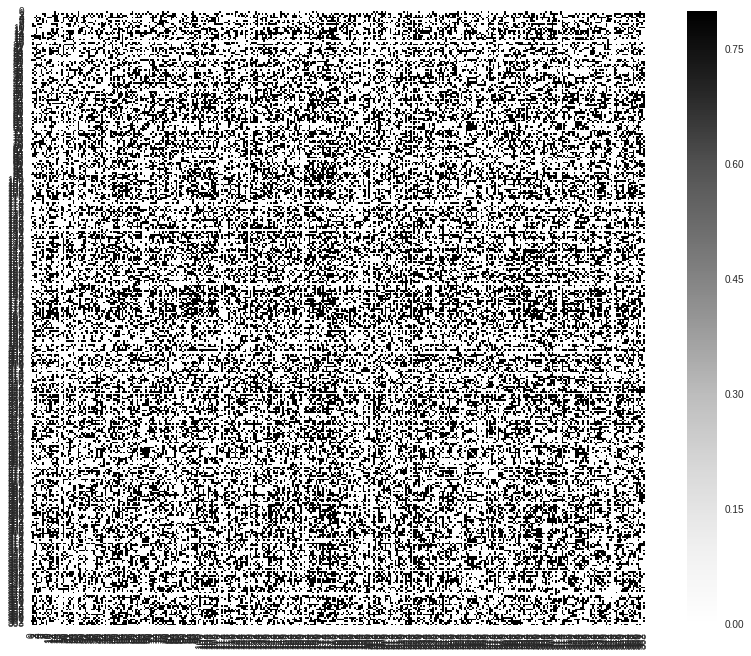

In [72]:
f, ax = plt.subplots(figsize=(15, 11))
sb.heatmap(match_matrix, vmax=.8, square=True, cmap='Greys')